In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()  # This will prompt file upload dialog in Colab
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

Saving Book1.csv to Book1.csv
Uploaded file: Book1.csv


In [ ]:
# Now load the uploaded file
import pandas as pd
df = pd.read_excel(filename, engine='openpyxl')
print(f"Successfully loaded '{filename}'")

Successfully loaded 'Book1.csv'


In [ ]:
# Drop non-useful columns
df = df.drop(columns=['Timestamp'])

In [ ]:
# Label encode target variable: Diabetes
df['Diabetes'] = df['Have you been diagnosed with diabetes at any point in your life?'].map({'Yes':1, 'No':0})
df = df.drop(columns=['Have you been diagnosed with diabetes at any point in your life?'])

In [ ]:
# One-hot encode categorical variable 'What is Your Gender?'
df = pd.get_dummies(df, columns=['What is Your Gender?'], prefix='Gender')

In [ ]:
# Convert Yes/No columns to 1/0
binary_cols = [
    'Have you engaged in any physical activity or exercise, other than your regular job, on at least 3 days per week',
    'Do you smoke more than 10 cigarettes per day?',
    'Do you consume alcohol above this heavy drinking threshold?',
    'Has your mother or father ever been diagnosed with diabetes?'
]
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

In [ ]:
# Normalize numerical features
scaler = MinMaxScaler()
num_cols = ['What is your age?', 'What is your Height?', 'What is your Weight?']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Prepare features and target
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)
print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

Train features shape: (203, 10)
Test features shape: (51, 10)


In [ ]:
# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"Class weights: {class_weights_dict}")

Class weights: {0: np.float64(0.5901162790697675), 1: np.float64(3.274193548387097)}


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6323 - loss: 0.6770 - val_accuracy: 0.8431 - val_loss: 0.5941
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8380 - loss: 0.5790 - val_accuracy: 0.8431 - val_loss: 0.5026
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8418 - loss: 0.4946 - val_accuracy: 0.8431 - val_loss: 0.4408
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8444 - loss: 0.4352 - val_accuracy: 0.8431 - val_loss: 0.4342
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8573 - loss: 0.4165 - val_accuracy: 0.8431 - val_loss: 0.4312
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8441 - loss: 0.4393 - val_accuracy: 0.8431 - val_loss: 0.4232
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8730 - loss: 0.3833 - val_accuracy: 0.8431 - val_loss: 0.4173
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8257 - loss: 0.4617 - val_accuracy: 0.8431 - val_loss: 0.4150


In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


Test Accuracy: 86.27%
Test Loss: 0.5961


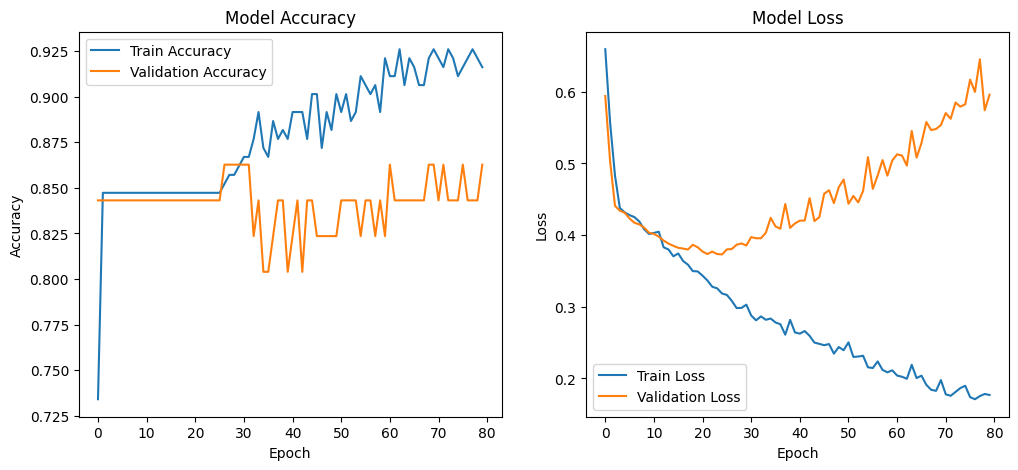

In [ ]:
# Plot curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()